# Finesse measurements


First step is to do a full sweep over 20 mu

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from time import sleep, time
import datetime
import os

# Loads nicard and scope
manager.startModule('logic','cavitylogic')

Connected to TEKTRONIX,DPO2014B,C010144,CF:91.1CT FV:v1.52 



0

Setting up NI card and scope for full sweep

In [2]:
cavitylogic.start_full_sweep()

Get data from scope

In [3]:
cavitylogic._get_scope_data()

In [4]:
cavitylogic._save_raw_data()

In [5]:
cavitylogic._trim_data()
cavitylogic._fit_ramp()

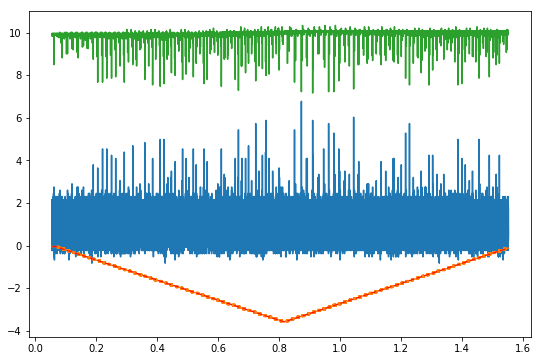

In [6]:
plt.plot(cavitylogic.time_trim,cavitylogic.volts_trim[3]/np.mean(cavitylogic.volts[3]))
plt.plot(cavitylogic.time_trim,cavitylogic.volts_trim[1])
plt.plot(cavitylogic.time_trim,cavitylogic.volts_trim[0]/np.mean(0.1*cavitylogic.volts[0]))
plt.plot(cavitylogic.time_trim, cavitylogic._ni.sweep_function(cavitylogic.time_trim, *cavitylogic.popt), 'r--', linewidth = 1, label='fit')
#plt.savefig(os.path.join(filepath, filename)+'.png', dpi=200)
plt.show()

For each peak in the list go to that point and scan around this point

In [ ]:
RepOfSweep = 10
freq = 40
SampNum = 10000
delta_scan = 0.05 # v
for peak_voltage in peaks:
    # Go to point
    ni._write_cavity_ao(np.array([peak_voltage]),start=True)
   
    # Make #N scans (Manual set scope to scale)
    start_voltage = peak_voltage + delta_scan
    stop_voltage = peak_voltage - delta_scan 
    ni.set_up_sweep(SampNum, start_voltage, stop_voltage, freq, RepOfSweep)
    
    #start scan
    scope.run_single()
    sleep(0.3)
    ni.start_sweep()
    
    #Get data
    
    
    #Close scan
    ni.stop_sweep()
    ni.close_sweep()
    
    